# Summary

### Installation of libraries

In [3]:
!pip install schedule
!pip install pymongo
!pip install psycopg2-binary
!pip install pyspark
!pip install kafka
!pip uninstall kafka -y
!pip install kafka-python
!pip uninstall -y numpy spacy h5py
!pip install numpy==1.26.4
!pip install spacy==3.8.5
!pip install h5py --upgrade
!python -m spacy download en_core_web_sm
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install pydantic==1.10.13
!pip uninstall pydantic -y
!pip install "pydantic<2.0.0"
!pip install prophet

  Using cached kafka-1.3.5-py2.py3-none-any.whl.metadata (6.9 kB)
Using cached kafka-1.3.5-py2.py3-none-any.whl (207 kB)
Found existing installation: kafka 1.3.5
Uninstalling kafka-1.3.5:
  Successfully uninstalled kafka-1.3.5
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: spacy 3.8.5
Uninstalling spacy-3.8.5:
  Successfully uninstalled spacy-3.8.5
Found existing installation: h5py 3.13.0
Uninstalling h5py-3.13.0:
  Successfully uninstalled h5py-3.13.0


You can safely remove it manually.
You can safely remove it manually.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras 3.9.2 requires h5py, which is not installed.


  Using cached spacy-3.8.5-cp312-cp312-win_amd64.whl.metadata (28 kB)
Using cached spacy-3.8.5-cp312-cp312-win_amd64.whl (11.8 MB)
  Using cached h5py-3.13.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
Using cached h5py-3.13.0-cp312-cp312-win_amd64.whl (3.0 MB)
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.3/12.8 MB 11.3 MB/s eta 0:00:02
     --------------- ------------------------ 5.0/12.8 MB 15.1 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 16.3 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 17.2 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 15.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
[+] Download and in

  You can safely remove it manually.


Found existing installation: pydantic 1.10.13
Uninstalling pydantic-1.10.13:
  Successfully uninstalled pydantic-1.10.13
  Using cached pydantic-1.10.22-cp312-cp312-win_amd64.whl.metadata (155 kB)
Using cached pydantic-1.10.22-cp312-cp312-win_amd64.whl (2.2 MB)


### Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("MyLocalSparkApp") \
    .master("local[*]") \
    .getOrCreate()
from pyspark.sql import DataFrame
from pyspark.sql.types import *
import spacy
from prophet import Prophet
from pymongo import MongoClient
import psycopg2
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import spacy
from transformers import pipeline
from statsmodels.tsa.arima.model import ARIMA 

# Phase1 : Fetching, Cleaning  and Statistical Analysis of data

In [7]:
### 1.1 Fetching the data

In [8]:
# Load the CSV file and display the first few rows to understand its structure and content.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
movies_df = pd.read_csv(r'IMDB_Movies.csv')

# Display the first few rows of the dataframe
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
movies_df.shape
movies_df.info()
movies_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [10]:
### 1.2 Cleaning the data

In [11]:
missing_values = movies_df.isnull().sum()
missing_values

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
movies_df['title_year'] = pd.to_datetime(movies_df['title_year'], errors='coerce').dt.year

# Remove duplicates
movies_df.drop_duplicates(inplace=True)
movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [13]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['actor_2_name'].isnull().sum() > 0:
        mode_val = movies_df['actor_2_name'].mode()[0]
        movies_df['actor_2_name'] = movies_df['actor_2_name'].fillna(mode_val)

movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [14]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['actor_1_name'].isnull().sum() > 0:
        mode_val = movies_df['actor_1_name'].mode()[0]
        movies_df['actor_1_name'] = movies_df['actor_1_name'].fillna(mode_val)

movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [15]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['actor_3_name'].isnull().sum() > 0:
        mode_val = movies_df['actor_3_name'].mode()[0]
        movies_df['actor_3_name'] = movies_df['actor_3_name'].fillna(mode_val)

movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [16]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['language'].isnull().sum() > 0:
        mode_val = movies_df['language'].mode()[0]
        movies_df['language'] = movies_df['language'].fillna(mode_val)

movies_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,English,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [17]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['country'].isnull().sum() > 0:
        mode_val = movies_df['country'].mode()[0]
        movies_df['country'] = movies_df['country'].fillna(mode_val)

movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,English,USA,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [18]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['color'].isnull().sum() > 0:
        mode_val = movies_df['color'].mode()[0]
        movies_df['color'] = movies_df['color'].fillna(mode_val)

movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,English,USA,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [19]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['director_name'].isnull().sum() > 0:
        mode_val = movies_df['director_name'].mode()[0]
        movies_df['director_name'] = movies_df['director_name'].fillna(mode_val)

movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,English,USA,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,Steven Spielberg,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [20]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['plot_keywords'].isnull().sum() > 0:
        mode_val = movies_df['plot_keywords'].mode()[0]
        movies_df['plot_keywords'] = movies_df['plot_keywords'].fillna(mode_val)

movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,English,USA,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,Steven Spielberg,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [21]:
# Fill categorical columns (object type) with mode
for column in movies_df.select_dtypes(include='object').columns:
    if movies_df['content_rating'].isnull().sum() > 0:
        mode_val = movies_df['content_rating'].mode()[0]
        movies_df['content_rating'] = movies_df['content_rating'].fillna(mode_val)

movies_df


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,1970.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,1970.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,English,USA,R,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,R,NaN,1970.0,470.0,7.7,NaN,84
5039,Color,Steven Spielberg,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,R,1400.0,1970.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,1970.0,719.0,6.3,2.35,660


In [22]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['num_critic_for_reviews'].isnull().sum() > 0:
        median_val = movies_df['num_critic_for_reviews'].median()
        movies_df['num_critic_for_reviews'] = movies_df['num_critic_for_reviews'].fillna(median_val)

In [23]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['duration'].isnull().sum() > 0:
        median_val = movies_df['duration'].median()
        movies_df['duration'] = movies_df['duration'].fillna(median_val)

In [24]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['director_facebook_likes'].isnull().sum() > 0:
        median_val = movies_df['director_facebook_likes'].median()
        movies_df['director_facebook_likes'] = movies_df['director_facebook_likes'].fillna(median_val)

In [25]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df[column].isnull().sum() > 0:
        median_val = movies_df['actor_3_facebook_likes'].median()
        movies_df['actor_3_facebook_likes'] = movies_df['actor_3_facebook_likes'].fillna(median_val)

In [26]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['actor_1_facebook_likes'].isnull().sum() > 0:
        median_val = movies_df['actor_1_facebook_likes'].median()
        movies_df['actor_1_facebook_likes'] = movies_df['actor_1_facebook_likes'].fillna(median_val)

In [27]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['gross'].isnull().sum() > 0:
        median_val = movies_df['gross'].median()
        movies_df['gross'] = movies_df['gross'].fillna(median_val)

In [28]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['facenumber_in_poster'].isnull().sum() > 0:
        median_val = movies_df['facenumber_in_poster'].median()
        movies_df['facenumber_in_poster'] = movies_df['facenumber_in_poster'].fillna(median_val)

In [29]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['budget'].isnull().sum() > 0:
        median_val = movies_df['budget'].median()
        movies_df['budget'] = movies_df['budget'].fillna(median_val)

In [30]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['actor_2_facebook_likes'].isnull().sum() > 0:
        median_val = movies_df['actor_2_facebook_likes'].median()
        movies_df['actor_2_facebook_likes'] = movies_df['actor_2_facebook_likes'].fillna(median_val)

In [31]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['aspect_ratio'].isnull().sum() > 0:
        median_val = movies_df['aspect_ratio'].median()
        movies_df['aspect_ratio'] = movies_df['aspect_ratio'].fillna(median_val)

In [32]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['aspect_ratio'].isnull().sum() > 0:
        median_val = movies_df['aspect_ratio'].median()
        movies_df['aspect_ratio'] = movies_df['aspect_ratio'].fillna(median_val)

In [33]:
#to change datatype from object to integer
movies_df['num_user_for_reviews'] = pd.to_numeric(movies_df['num_user_for_reviews'], errors='coerce')


In [34]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['num_user_for_reviews'].isnull().sum() > 0:
        median_val = movies_df['num_user_for_reviews'].median()
        movies_df['num_user_for_reviews'] = movies_df['num_user_for_reviews'].fillna(median_val)

In [35]:
# Fill numerical columns with median (to reduce outlier effect)
for column in movies_df.select_dtypes(include=['float64', 'int64']).columns:
    if movies_df['title_year'].isnull().sum() > 0:
        median_val = movies_df['title_year'].median()
        movies_df['title_year'] = movies_df['title_year'].fillna(median_val)

In [36]:
null_values = movies_df.isnull().sum()
null_values

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

### 1.3 Statistical Analysis

### Distribution Of IMDB Score

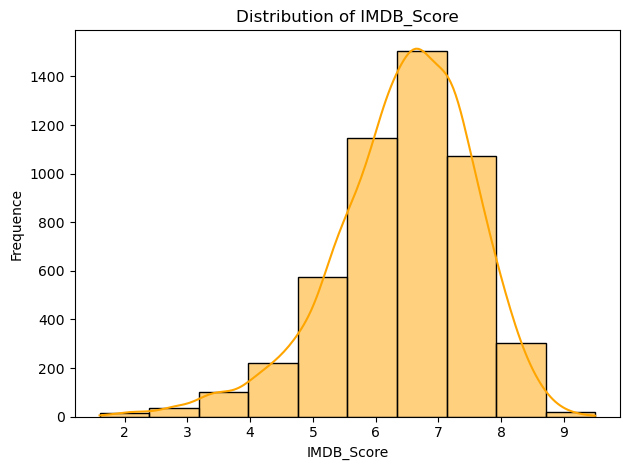

In [39]:
sns.histplot(movies_df['imdb_score'],kde = True,bins = 10,color = 'orange')
plt.title('Distribution of IMDB_Score')
plt.xlabel('IMDB_Score')
plt.ylabel('Frequence')
plt.tight_layout()
plt.show()

### Main Genres

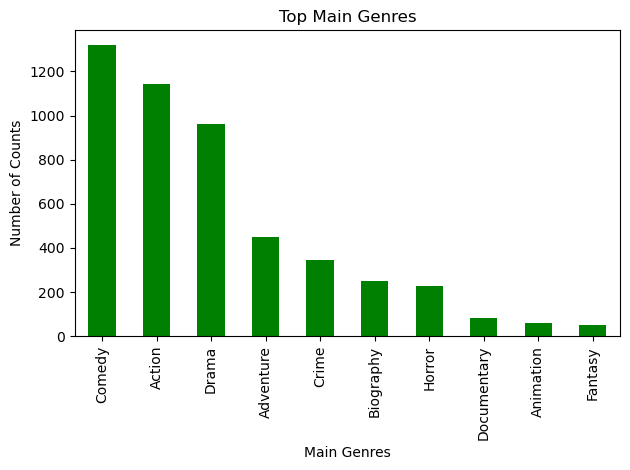

In [41]:
movies_df['main_genres'] = movies_df['genres'].apply(lambda x:x.split('|')[0] if pd.notnull(x) else x)
top_genres = movies_df['main_genres'].value_counts().head(10)

top_genres.plot(kind = 'bar', color = 'green')
plt.title('Top Main Genres')
plt.xlabel('Main Genres')
plt.ylabel('Number of Counts')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Movie Budget VS Gross

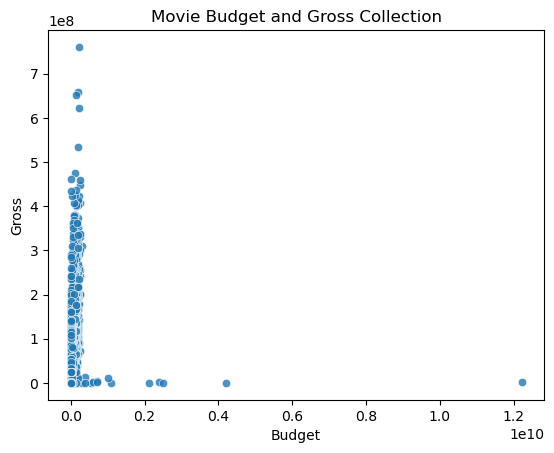

In [43]:
sns.scatterplot(data = movies_df,x = 'budget',y = 'gross',alpha = 0.8)
plt.title("Movie Budget and Gross Collection")
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

### Average IMDB Score by Main Genre

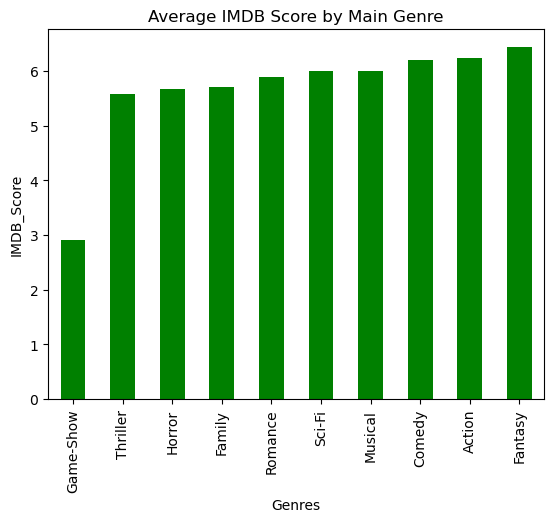

In [45]:
avarage_imdb_from_MainGenre = movies_df.groupby('main_genres')['imdb_score'].mean().sort_values(ascending = True).head(10)
avarage_imdb_from_MainGenre.plot(kind = 'bar',color = 'green')
plt.title('Average IMDB Score by Main Genre')
plt.xlabel('Genres')
plt.ylabel('IMDB_Score')
plt.show()

### IMDB Score by Content Rating

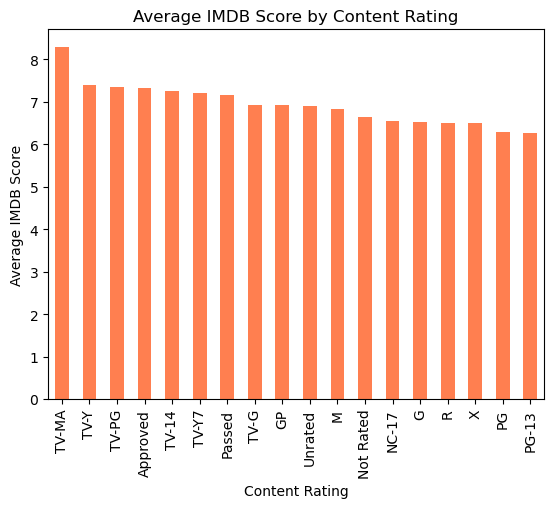

In [47]:
rating_scores = movies_df.groupby('content_rating')['imdb_score'].mean().sort_values(ascending=False)

rating_scores.plot(kind='bar', color='coral')
plt.title('Average IMDB Score by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average IMDB Score')
plt.xticks(rotation=90)
plt.show()


### Correlation matrix

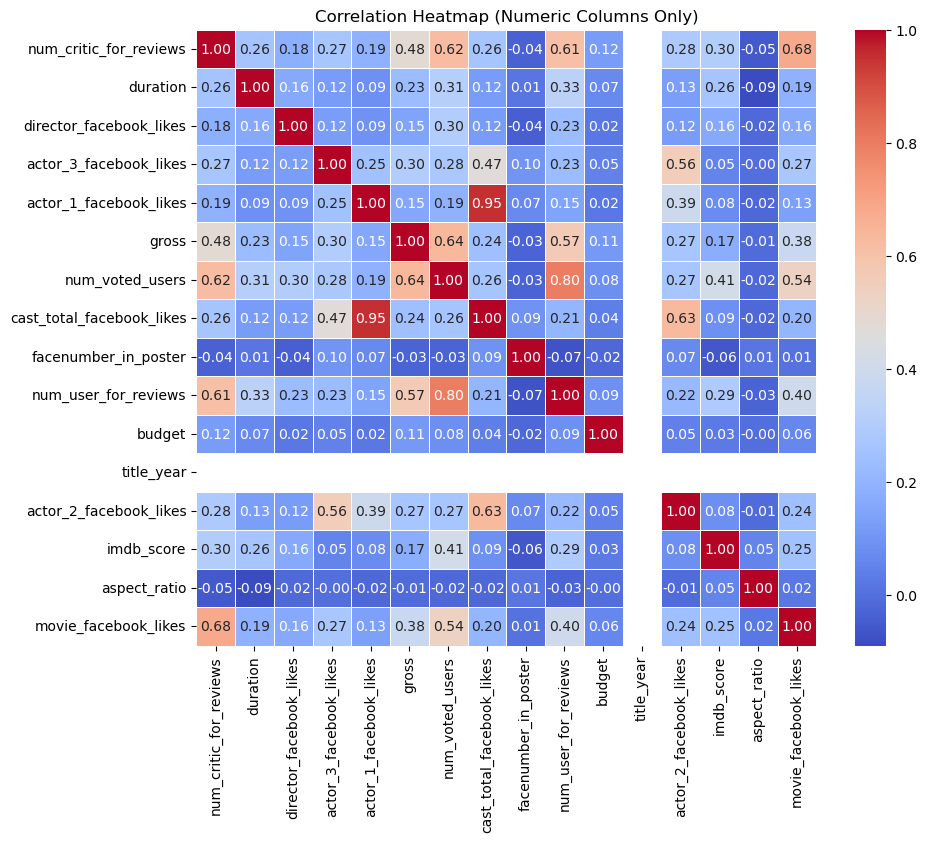

In [49]:
numeric_df = movies_df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap (Numeric Columns Only)')

# Show plot
plt.show()

### Correlation between total facebook likes vs Actor1 Facebook likes

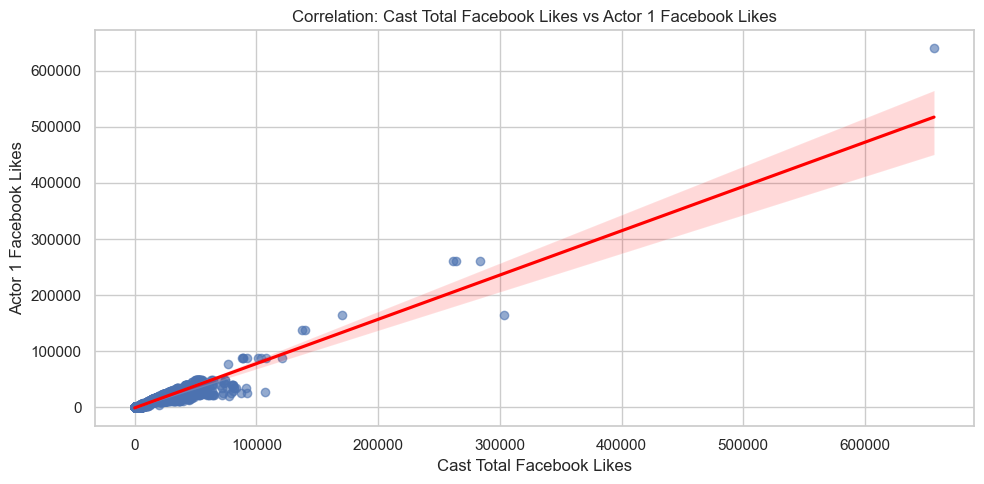

In [51]:
sns.set(style="whitegrid")
#cast_total_facebook_likes vs actor_1_facebook_likes ---
plt.figure(figsize=(10, 5))
sns.regplot(
    data=movies_df,
    x='cast_total_facebook_likes',
    y='actor_1_facebook_likes',
    scatter_kws={'alpha':0.6},
    line_kws={"color": "red"}
)
plt.title('Correlation: Cast Total Facebook Likes vs Actor 1 Facebook Likes')
plt.xlabel('Cast Total Facebook Likes')
plt.ylabel('Actor 1 Facebook Likes')
plt.tight_layout()
plt.show()

### Correlation between number of user reviews vs  Number of Voted Users

In [53]:
# Convert to numeric, coercing errors (invalid parsing will become NaN)
movies_df['num_user_for_reviews'] = pd.to_numeric(movies_df['num_user_for_reviews'], errors='coerce')
movies_df['num_voted_users'] = pd.to_numeric(movies_df['num_voted_users'], errors='coerce')

# Drop rows with NaNs in these columns
movies_df.dropna(subset=['num_user_for_reviews', 'num_voted_users'], inplace=True)


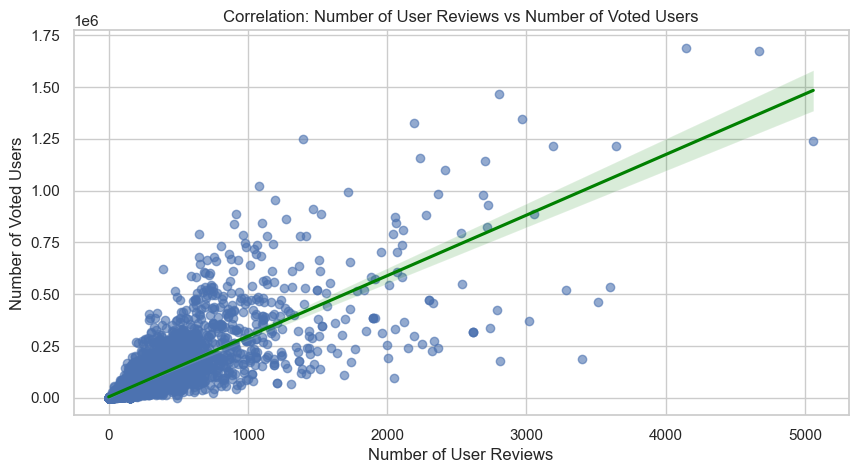

In [54]:
plt.figure(figsize=(10, 5))
sns.regplot(
    data=movies_df,
    x='num_user_for_reviews',
    y='num_voted_users',
    scatter_kws={'alpha':0.6},
    line_kws={"color": "green"}
)
plt.title('Correlation: Number of User Reviews vs Number of Voted Users')
plt.xlabel('Number of User Reviews')
plt.ylabel('Number of Voted Users')
plt.show()


In [55]:
### to find outliers

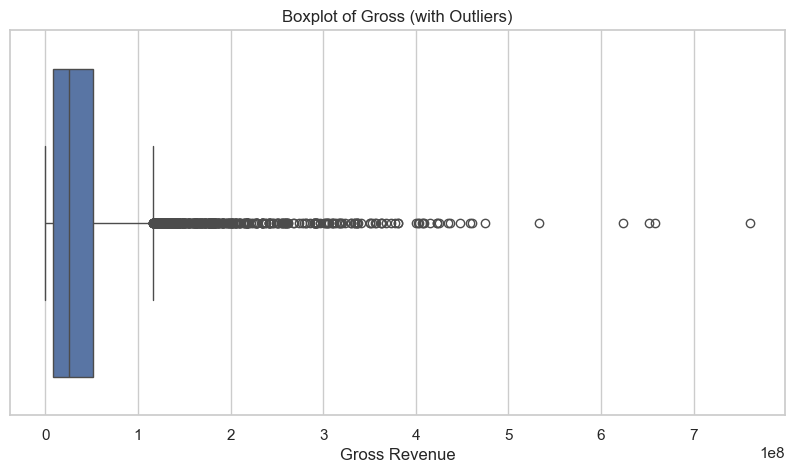

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=movies_df['gross'])
plt.title("Boxplot of Gross (with Outliers)")
plt.xlabel("Gross Revenue")
plt.show()

### finding Outliers

In [58]:
movies_df.loc[:, 'gross'] = movies_df['gross'].astype(float)


In [59]:
movies_df = movies_df[pd.to_numeric(movies_df['gross'], errors='coerce').notnull()]
movies_df['gross'] = movies_df['gross'].astype(float)

# Calculate Q1 and Q3
Q1 = movies_df['gross'].quantile(0.25)
Q3 = movies_df['gross'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = movies_df[(movies_df['gross'] < lower_bound) | (movies_df['gross'] > upper_bound)]

# Display outliers
print("Outliers in 'gross':")
print(outliers[['gross']])

# remove outliers
movies_df1 = movies_df[(movies_df['gross'] >= lower_bound) & (movies_df['gross'] <= upper_bound)]

Outliers in 'gross':
            gross
0     760505847.0
1     309404152.0
2     200074175.0
3     448130642.0
6     336530303.0
...           ...
4557  143492840.0
4694  218051260.0
4707  140530114.0
4752  177343675.0
4778  234903076.0

[469 rows x 1 columns]


In [60]:
movies_df1.shape

(4529, 29)

In [61]:
# Save the DataFrame without outliers to a CSV file
movies_df1.to_csv("Movies_Gross_No_Outliers.csv", index=False)

print("Outlier-removed DataFrame saved as 'Movies_Gross_No_Outliers.csv'")

Outlier-removed DataFrame saved as 'Movies_Gross_No_Outliers.csv'


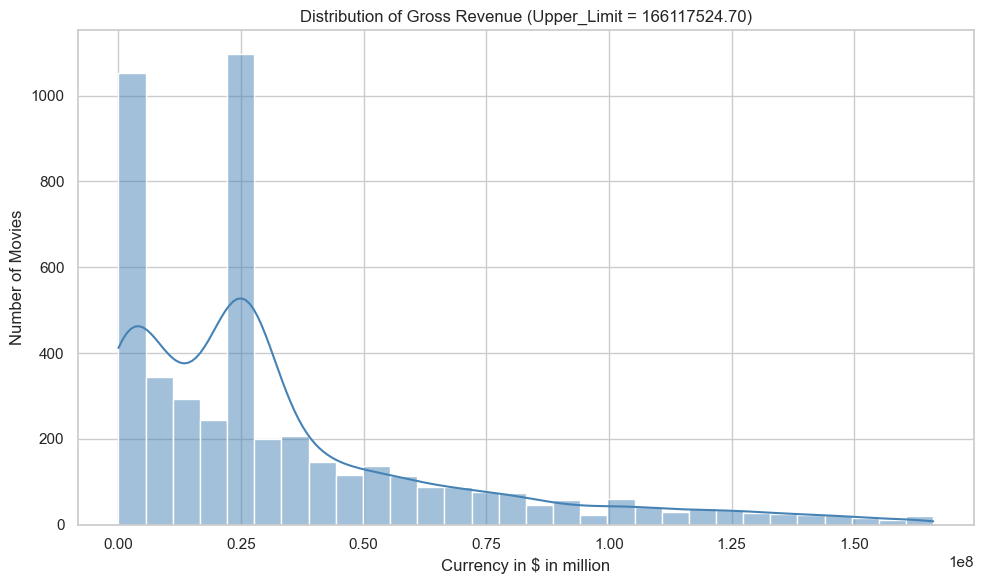

In [62]:
upper_limit = movies_df['gross'].quantile(0.95)

# Create new DataFrame with no outliers (top 5% removed)
df_no_outliers = movies_df[movies_df['gross'] <= upper_limit]

# Save to CSV
df_no_outliers.to_csv('movies_95_percent.csv', index=False)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['gross'], bins=30, kde=True, color='steelblue')
plt.title(f'Distribution of Gross Revenue (Upper_Limit = {upper_limit:.2f})')
plt.xlabel('Currency in $ in million')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
df_no_outliers.shape

(4748, 29)

# Phase 2 Data Ingestion and Processing with cleaned data

### 2.1 Simulate Real-Time Ingestion (Kafka Style)

In [66]:
df = pd.read_csv('movies_95_percent.csv')

In [67]:
import time

def stream_data(dataframe):
    for _, row in dataframe.iterrows():
        print(f"Ingesting: {row.to_dict()}")
        time.sleep(1)  # Simulate delay like Kafka stream

stream_data(df.head(5))  # Test with first 5 rows


Ingesting: {'color': 'Color', 'director_name': 'Doug Walker', 'num_critic_for_reviews': 110.0, 'duration': 103.0, 'director_facebook_likes': 131.0, 'actor_3_facebook_likes': 369.0, 'actor_2_name': 'Rob Walker', 'actor_1_facebook_likes': 131.0, 'gross': 25445749.0, 'genres': 'Documentary', 'actor_1_name': 'Doug Walker', 'movie_title': 'Star Wars: Episode VII - The Force Awakens\xa0            ', 'num_voted_users': 8, 'cast_total_facebook_likes': 143, 'actor_3_name': 'Ben Mendelsohn', 'facenumber_in_poster': 0.0, 'plot_keywords': 'based on novel', 'movie_imdb_link': 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1', 'num_user_for_reviews': 156.0, 'language': 'English', 'country': 'USA', 'content_rating': 'R', 'budget': 20000000.0, 'title_year': 1970.0, 'actor_2_facebook_likes': 12.0, 'imdb_score': 7.1, 'aspect_ratio': 2.35, 'movie_facebook_likes': 0, 'main_genres': 'Documentary'}
Ingesting: {'color': 'Color', 'director_name': 'Andrew Stanton', 'num_critic_for_reviews': 462.0, 'durat

### 2.2 Batch Processing (Simulating Apache Spark)

In [69]:
# Convert pandas dataframe to PySpark dataframe
spark_df = spark.createDataFrame(df)
spark_df.printSchema()
spark_df.show(5)

root
 |-- color: string (nullable = true)
 |-- director_name: string (nullable = true)
 |-- num_critic_for_reviews: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- director_facebook_likes: double (nullable = true)
 |-- actor_3_facebook_likes: double (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_1_facebook_likes: double (nullable = true)
 |-- gross: double (nullable = true)
 |-- genres: string (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- movie_title: string (nullable = true)
 |-- num_voted_users: long (nullable = true)
 |-- cast_total_facebook_likes: long (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- facenumber_in_poster: double (nullable = true)
 |-- plot_keywords: string (nullable = true)
 |-- movie_imdb_link: string (nullable = true)
 |-- num_user_for_reviews: double (nullable = true)
 |-- language: string (nullable = true)
 |-- country: string (nullable = true)
 |-- content_rating: string (nu

Py4JJavaError: An error occurred while calling o47.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0) (LAPTOP-639GDDLO executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4333)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3316)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3316)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3539)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more


# Phase 3: ETL pipeline and Data Storage

### 3.1 With MongoDb

In [71]:
# Step 1: Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["movie_db"]
collection = db["movies_collection"]

# Step 2: Ingest Data
df = pd.read_csv("movies_95_percent.csv")

# Step 3: Clean Data
df_clean = df.dropna()

# Step 4: Store Data in MongoDB
collection.delete_many({})  # Optional: Clear old data first
collection.insert_many(df_clean.to_dict(orient="records"))

print("✅ ETL pipeline completed successfully!")


✅ ETL pipeline completed successfully!


### 3.2 with PostgreSQL

In [73]:
# Define connection parameters
host = "localhost"
database = "movies_db"
user = "postgres"
password = "1234"  # Change this

# Create connection using SQLAlchemy
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{database}')


In [75]:
df_clean.to_sql("movies_cleaned", engine, if_exists="replace", index=False)
print("✅ Data successfully loaded into PostgreSQL!")

OperationalError: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: FATAL:  database "movies_db" does not exist

(Background on this error at: https://sqlalche.me/e/20/e3q8)

# Phase 4: ML-Based Insights (Trend Prediction, Anomaly Detection)

In [78]:
# Step 1: Create simplified features
movies_df['Director_Nolan'] = movies_df['director_name'].apply(lambda x: 1 if x == 'Christopher Nolan' else 0)
movies_df['Genre_Action'] = movies_df['genres'].apply(lambda x: 1 if isinstance(x, str) and 'Action' in x else 0)
movies_df['Actor_Leo'] = movies_df['actor_1_name'].apply(lambda x: 1 if x == 'Leonardo DiCaprio' else 0)

# Step 2: Select only the required columns
selected_columns = ['budget', 'duration', 'Director_Nolan', 'Genre_Action', 'Actor_Leo', 'imdb_score']
df_model = movies_df[selected_columns].dropna()  # Remove rows with missing values

# Step 3: Split data
X = df_model.drop('imdb_score', axis=1)
y = df_model['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build model pipeline
model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 1.2504397169957124
R²: -0.003576393005073397


In [80]:
# Example: Predict for a movie with Nolan, Action, Leo
new_movie = pd.DataFrame([{
    'budget': 16000000,
    'duration': 60,
    'Director_Nolan': 0,
    'Genre_Action': 0,
    'Actor_Leo': 0
}])

predicted_score = model.predict(new_movie)
print(f"Predicted IMDb Score: {predicted_score[0]:.2f}")


Predicted IMDb Score: 7.63


### 4.1 Machine Learning-Based Insights
Train and use ML models like RandomForest, XGBoost for trend prediction and anomaly detection.

In [82]:
# Encode object (string) columns using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # Ensure all values are strings
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop("gross", axis=1)  # Features
y = df["gross"]  # Target

# Split train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation Metrics
def evaluate(model_name, y_test, y_pred):
    print(f"\n {model_name} Evaluation:")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):,.2f}")

evaluate("XGBoost", y_test, xgb_pred)
evaluate("Random Forest", y_test, rf_pred)



 XGBoost Evaluation:
R2 Score: 0.5768
Mean Squared Error: 572,929,028,509,475.88

 Random Forest Evaluation:
R2 Score: 0.5906
Mean Squared Error: 554,294,562,508,407.44


## 4.2 NLP with SpaCy & BERT
Extract structured insights from raw text using SpaCy and Transformers.

In [83]:
# Load a SpaCy model (small English model is a good starting point)
nlp = spacy.load("en_core_web_sm")

def analyze_text(text):
    doc = nlp(text)
    # Example: Extract named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    # Example: Extract keywords (simplified)
    keywords = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return entities, keywords


In [84]:
# Assuming you have a 'text_column' in your DataFrame
df['entities'], df['keywords'] = zip(*df['movie_title'].astype(str).apply(analyze_text))

print(df[['movie_title', 'entities', 'keywords']].head())


   movie_title        entities keywords
0         3169  [(3169, DATE)]       []
1         1867  [(1867, DATE)]       []
2         3839  [(3839, DATE)]       []
3         3483  [(3483, DATE)]       []
4         2807  [(2807, DATE)]       []


In [86]:
from transformers import pipeline
# Load a pre-trained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

def get_sentiment(text):
    result = sentiment_pipeline(text)
    return result[0]['label'], result[0]['score']

df['sentiment'], df['sentiment_score'] = zip(*df['imdb_score'].astype(str).apply(get_sentiment))

print(df[['imdb_score', 'sentiment', 'sentiment_score']].head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


   imdb_score sentiment  sentiment_score
0         7.1  POSITIVE         0.994071
1         6.6  POSITIVE         0.991444
2         6.5  POSITIVE         0.992694
3         6.6  POSITIVE         0.991444
4         6.7  POSITIVE         0.989836


### 4.3 AI-Based Forecasting (Time Series)
Use TensorFlow or PyTorch for time series prediction

In [89]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd

# Ensure df exists and columns are clean
df = df[['num_user_for_reviews', 'gross']].dropna()

# Set index to num_user_for_reviews (must be numeric or datetime-like)
df = df.sort_values(by='num_user_for_reviews')  # Sort to simulate time progression
df.set_index('num_user_for_reviews', inplace=True)

# ARIMA Model — adjust order=(p,d,q) as needed
model = ARIMA(df['gross'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the next N steps (same length as current data here)
predictions = model_fit.forecast(steps=len(df))

# Evaluate performance using in-sample data (not future prediction)
rmse = mean_squared_error(df['gross'], predictions, squared=False)
print(f"RMSE: {rmse}")


C:\Users\Ankita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ankita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ankita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 47992209.38287757


C:\Users\Ankita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ankita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Ankita\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
